<a href="https://colab.research.google.com/github/Adibank/DPDM/blob/master/Pandas_and_Data_Preprocessing_101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

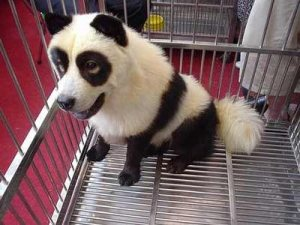


In [55]:
import pandas

In [56]:
import pandas as pd

In [57]:
from google.colab import drive

In [58]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
import os

In [60]:
path = '/content/drive/My Drive/DWDM_material'

In [61]:
search_click = os.path.join(path,'search_click.csv')
w_restaurant = os.path.join(path,'w_restaurant.csv')

In [62]:
search_click_df = pandas.read_csv(search_click)

In [63]:
search_click_df.head()

,click_timestamp,search_id,business_id,display_position,time_diff_nanos,ads
0,11:38.9,5c004472-5ecc-4159-9698-9f329b8e26e1,298839.0,0,2.222400e+15,True
1,30:51.3,5f34eca0-c04e-4c10-b600-54aa447dbd8e,171372.0,0,4.608380e+14,True
2,32:09.6,8dc6d1f0-11f1-4239-9dd2-5c1674c81224,16157.0,0,2.581490e+15,True
3,00:59.8,1a5810e9-3d1f-44b9-9a2e-26ede21c524b,89741.0,1,1.404580e+15,True
4,23:36.8,6bc75e0d-fc65-471e-9926-ff6be6708639,189564.0,1,9.333590e+14,True


In [64]:
w_restaurant_df = pandas.read_csv(w_restaurant)

In [65]:
w_restaurant_df.head()

,id,name,domain_id,closed,city_name,zipcode,geohash,new_open,weighted_average_rating,number_of_chains,number_of_bookmarks,number_of_reviews,number_of_product_tags,total_number_of_views,number_of_checkins,number_of_menu_groups,number_of_menu_photos,category_name,price_range,avg_price,parking,credit_card_accepted,good_for_groups,good_for_kids,bookable,best_of_wongnai,wifi,number_of_seats,music_venue,hotel_restaurant,pet_friendly,delivery
0,2,นครินทร์ทันตกรรม,2,0,Samut Songkhram,75000,w4rh7g3,0,5.000000,NaN,NaN,1,0,3016,0,0,0,Orthodontic,NaN,NaN,3.0,0.0,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN
1,4,Corner House,1,0,Bangkok Metropolitan Region,12150,w4rx73h,0,2.000000,NaN,NaN,1,0,321,0,0,1,Quick Meal,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5,วัดโลกยสุธาราม,4,0,Phra Nakhon Si Ayutthaya,13000,w4x98jk,0,4.000000,NaN,1.0,0,0,167,0,0,0,Historical/Religion,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6,นันท์คาราโอเกะ,1,0,Bangkok Metropolitan Region,10700,w4rqw9q,0,0.000000,NaN,NaN,0,0,901,0,0,0,Karaoke,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7,Buono Caffe,1,0,Bangkok Metropolitan Region,10220,w4rx4gd,0,3.738462,NaN,15.0,3,0,2360,1,0,2,Café/Coffee Shop,1.0,NaN,1.0,0.0,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN


# To check if the dimension of loaded data is correct as described in the description

In [66]:
search_click_df.shape #ดูรูปร่างของตารางเราว่ามันเป็นยังไง (จำนวนแถว,จำนวนหลัก)

(1048575, 6)

In [67]:
w_restaurant_df.shape

(246847, 32)

In [68]:
search_click_df.shape[0]

1048575

# It seem everything is ok, let's have fun with data

## 0.Point to data in the table

### normal indexing

In [69]:
search_click_df['search_id']

0          5c004472-5ecc-4159-9698-9f329b8e26e1
1          5f34eca0-c04e-4c10-b600-54aa447dbd8e
2          8dc6d1f0-11f1-4239-9dd2-5c1674c81224
3          1a5810e9-3d1f-44b9-9a2e-26ede21c524b
4          6bc75e0d-fc65-471e-9926-ff6be6708639
                           ...                 
1048570    99aab616-6fc5-4fbf-994b-4aebee7bb360
1048571    d70a2c5d-ee94-4e4c-9f7c-c5faac6db12a
1048572    4c1de7fe-300e-41aa-9d01-914344fc3753
1048573    2ec0ddec-e450-4b98-9779-42b77aa7eda5
1048574    5741d9cf-b9f1-441d-aa83-d2b0179bf874
Name: search_id, Length: 1048575, dtype: object

In [70]:
search_click_df['search_id'][0]

'5c004472-5ecc-4159-9698-9f329b8e26e1'

In [71]:
w_restaurant_df[['name','city_name','weighted_average_rating']] # list ของคอลัมน์ที่เราต้องการ

,name,city_name,weighted_average_rating
0,นครินทร์ทันตกรรม,Samut Songkhram,5.000000
1,Corner House,Bangkok Metropolitan Region,2.000000
2,วัดโลกยสุธาราม,Phra Nakhon Si Ayutthaya,4.000000
3,นันท์คาราโอเกะ,Bangkok Metropolitan Region,0.000000
4,Buono Caffe,Bangkok Metropolitan Region,3.738462
...,...,...,...
246842,Sushi Tama,Bangkok Metropolitan Region,3.663522
246843,สะบายดี คาราโอเกะ,Bangkok Metropolitan Region,0.000000
246844,สเต็กแม่&กาแฟลูก,Bangkok Metropolitan Region,4.000000
246845,Mom Made,Nakhon Si Thammarat,5.000000


### iloc

In [72]:
search_click_df.iloc[0,1]

'5c004472-5ecc-4159-9698-9f329b8e26e1'

In [73]:
search_click_df.iloc[:10,:2]

,click_timestamp,search_id
0,11:38.9,5c004472-5ecc-4159-9698-9f329b8e26e1
1,30:51.3,5f34eca0-c04e-4c10-b600-54aa447dbd8e
2,32:09.6,8dc6d1f0-11f1-4239-9dd2-5c1674c81224
3,00:59.8,1a5810e9-3d1f-44b9-9a2e-26ede21c524b
4,23:36.8,6bc75e0d-fc65-471e-9926-ff6be6708639
5,48:16.7,92ea02ba-2c89-4efd-973c-e23526c531de
6,39:18.4,79d61918-fb3e-4181-99b6-7a7abddfcdb1
7,33:39.0,7f8b2b57-dea1-4fe1-84c8-5a7d63750e47
8,07:48.3,3d9217bb-3eae-42b5-8cf3-a756efae2cfa
9,41:25.4,a2cb0d41-6e1f-4169-9140-cb671fbb41dc


## 1 Missing Values

In [74]:
search_click_df.isnull() #มันจะเช็คว่าแต่ละช่องเป็น null รึเปล่า ถ้าไม่เป็นจะขึ้น False ถ้าเป็นจะขึ้น True

,click_timestamp,search_id,business_id,display_position,time_diff_nanos,ads
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
1048570,False,False,False,False,False,False
1048571,False,False,False,False,False,False
1048572,False,False,False,False,False,False
1048573,False,False,False,False,False,False


In [75]:
search_click_df.isnull().any() #สรุปรวมความจริงทั้งหมดทางด้านส่วนของคอลัมน์โดยมันจะเอาค่าของความจริงมาเชื่อมด้วย *หรือ(ในทางตรรกศาสตร์)*

click_timestamp     False
search_id            True
business_id          True
display_position    False
time_diff_nanos     False
ads                 False
dtype: bool

In [76]:
search_click_df.isnull().any().any() #เอาค่า true false จากตารางข้างต้นมาเชื่อมด้วยหรือ ผลคือ true

True

## Handling missing values 1

In [77]:
search_click_df_nm = search_click_df.dropna()

In [78]:
search_click_df_nm.isnull().any().any()

False

In [79]:
print(search_click_df.shape)
print(search_click_df_nm.shape)

(1048575, 6)
(1048206, 6)


# Excercise 1 ตรวจสอบว่าการลบข้อมูล missing ออกจากตาราง w_restarant จะทำให้ข้อมูลลดลงกี่ %

In [80]:
w_restaurant_df_nm = w_restaurant_df.dropna()

In [81]:
w_restaurant_df_nm.isnull().any().any()

False

In [82]:
print(w_restaurant_df.shape)
print(w_restaurant_df_nm.shape)

(246847, 32)
(4, 32)


In [83]:
A = w_restaurant_df.shape[0]-w_restaurant_df_nm.shape[0]

In [84]:
(A*100)/w_restaurant_df.shape[0]

99.99837956304917

## Method 1.5

In [85]:
w_restaurant_df.isnull().any()

id                         False
name                       False
domain_id                  False
closed                     False
city_name                  False
zipcode                     True
geohash                    False
new_open                   False
weighted_average_rating    False
number_of_chains            True
number_of_bookmarks         True
number_of_reviews          False
number_of_product_tags     False
total_number_of_views      False
number_of_checkins         False
number_of_menu_groups      False
number_of_menu_photos      False
category_name              False
price_range                 True
avg_price                   True
parking                     True
credit_card_accepted        True
good_for_groups             True
good_for_kids               True
bookable                    True
best_of_wongnai             True
wifi                        True
number_of_seats             True
music_venue                 True
hotel_restaurant            True
pet_friend

In [86]:
w_rest_dropped_avgprice = w_restaurant_df.dropna(subset=['id','name','avg_price'])

In [87]:
w_rest_dropped_avgprice.head()

,id,name,domain_id,closed,city_name,zipcode,geohash,new_open,weighted_average_rating,number_of_chains,number_of_bookmarks,number_of_reviews,number_of_product_tags,total_number_of_views,number_of_checkins,number_of_menu_groups,number_of_menu_photos,category_name,price_range,avg_price,parking,credit_card_accepted,good_for_groups,good_for_kids,bookable,best_of_wongnai,wifi,number_of_seats,music_venue,hotel_restaurant,pet_friendly,delivery
11,27,แพอาหารธาราบุรี,1,0,Kanchanaburi,71000,w4qzbb4,0,3.568245,NaN,107.0,34,3,22277,26,0,0,Thai,3.0,375.0,3.0,1.0,1.0,1.0,1.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN
67,123,เล็กกุ้งเผา,1,0,Bangkok Metropolitan Region,10310,w4rw9mc,0,3.685552,NaN,272.0,29,7,28697,26,0,15,Thai,3.0,375.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91,175,ใต้ต้นมะม่วง,1,0,Phuket,83000,w1muz5d,0,3.857143,NaN,17.0,15,2,3278,6,0,3,Thai,1.0,50.0,1.0,0.0,1.0,1.0,0.0,NaN,0.0,2.0,NaN,NaN,NaN,NaN
129,262,Oniku Shabushabu & Yakiniku,1,0,Surat Thani,84000,w1weuxg,0,3.633588,NaN,40.0,19,2,10349,7,0,11,Sukiyaki/Shabu,3.0,375.0,3.0,1.0,1.0,1.0,1.0,NaN,1.0,5.0,NaN,0.0,NaN,1.0
134,271,Cafe Cha,1,0,Bangkok Metropolitan Region,10300,w4rqrhf,0,4.094527,NaN,251.0,12,0,17775,11,0,7,Café/Coffee Shop,4.0,175.0,3.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


In [88]:
w_restaurant_df.dropna(subset=['id','name','avg_price'])['avg_price'].mean()

327.44728783902013

## Method 2 (replace with reasonable value) แทนค่าด้วยตัวเลขที่เหมาะสม

### we are replacing missing value in the number of chains with 0

In [89]:
w_restaurant_df[['number_of_chains']] = w_restaurant_df[['number_of_chains']].fillna(0)

In [90]:
w_restaurant_df.isnull().any()

id                         False
name                       False
domain_id                  False
closed                     False
city_name                  False
zipcode                     True
geohash                    False
new_open                   False
weighted_average_rating    False
number_of_chains           False
number_of_bookmarks         True
number_of_reviews          False
number_of_product_tags     False
total_number_of_views      False
number_of_checkins         False
number_of_menu_groups      False
number_of_menu_photos      False
category_name              False
price_range                 True
avg_price                   True
parking                     True
credit_card_accepted        True
good_for_groups             True
good_for_kids               True
bookable                    True
best_of_wongnai             True
wifi                        True
number_of_seats             True
music_venue                 True
hotel_restaurant            True
pet_friend

In [91]:
w_restaurant_df[['number_of_chains']]

,number_of_chains
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
246842,3.0
246843,0.0
246844,0.0
246845,0.0


## Method 2.1 (replace with unknown value)
## Method 2.2 (replace with mean)

## Method 3

In [92]:
new_table = w_restaurant_df[['name','city_name','avg_price']]
new_table

,name,city_name,avg_price
0,นครินทร์ทันตกรรม,Samut Songkhram,NaN
1,Corner House,Bangkok Metropolitan Region,NaN
2,วัดโลกยสุธาราม,Phra Nakhon Si Ayutthaya,NaN
3,นันท์คาราโอเกะ,Bangkok Metropolitan Region,NaN
4,Buono Caffe,Bangkok Metropolitan Region,NaN
...,...,...,...
246842,Sushi Tama,Bangkok Metropolitan Region,NaN
246843,สะบายดี คาราโอเกะ,Bangkok Metropolitan Region,NaN
246844,สเต็กแม่&กาแฟลูก,Bangkok Metropolitan Region,NaN
246845,Mom Made,Nakhon Si Thammarat,NaN


##[PD] select data

In [93]:
selected_list = new_table['city_name'] == 'Bangkok Metropolitan Region'
selected_list 

0         False
1          True
2         False
3          True
4          True
          ...  
246842     True
246843     True
246844     True
246845    False
246846    False
Name: city_name, Length: 246847, dtype: bool

In [94]:
new_table[selected_list].head() #ตามจริงมีมากกว่านี้แต่ว่าเรา .head() มันเลยโชว์แค่หัวตาราง

,name,city_name,avg_price
1,Corner House,Bangkok Metropolitan Region,NaN
3,นันท์คาราโอเกะ,Bangkok Metropolitan Region,NaN
4,Buono Caffe,Bangkok Metropolitan Region,NaN
7,Sazanami,Bangkok Metropolitan Region,NaN
10,Rotee Me Chabu,Bangkok Metropolitan Region,NaN


In [100]:
new_table[new_table['city_name']=='Bangkok Metropolitan Region'].head()

,name,city_name,avg_price
1,Corner House,Bangkok Metropolitan Region,NaN
3,นันท์คาราโอเกะ,Bangkok Metropolitan Region,NaN
4,Buono Caffe,Bangkok Metropolitan Region,NaN
7,Sazanami,Bangkok Metropolitan Region,NaN
10,Rotee Me Chabu,Bangkok Metropolitan Region,NaN


## หาราคาเฉลี่ยของร้านในจังหวัด กทม.

In [101]:
new_table[new_table['city_name']=='Bangkok Metropolitan Region'].dropna()['avg_price'].mean()

392.5854715094968

1. เลือกเฉพาะ กทม

In [102]:
bkk_table = new_table[new_table['city_name']=='Bangkok Metropolitan Region']
bkk_table.head()

,name,city_name,avg_price
1,Corner House,Bangkok Metropolitan Region,NaN
3,นันท์คาราโอเกะ,Bangkok Metropolitan Region,NaN
4,Buono Caffe,Bangkok Metropolitan Region,NaN
7,Sazanami,Bangkok Metropolitan Region,NaN
10,Rotee Me Chabu,Bangkok Metropolitan Region,NaN


2. ลบ missing

In [103]:
bkk_table_dp = bkk_table.dropna()
bkk_table_dp.head()

,name,city_name,avg_price
67,เล็กกุ้งเผา,Bangkok Metropolitan Region,375.0
134,Cafe Cha,Bangkok Metropolitan Region,175.0
247,Masterpiece clinic,Bangkok Metropolitan Region,1500.0
319,Chaba Nails & Eyelashes Pro,Bangkok Metropolitan Region,375.0
382,Panlee Bakery,Bangkok Metropolitan Region,175.0


3 เลือกเฉพาะ column 'avg_price'

In [104]:
bkk_table_dp_avg_price = bkk_table_dp['avg_price']
bkk_table_dp_avg_price

67         375.0
134        175.0
247       1500.0
319        375.0
382        175.0
           ...  
246458      50.0
246472    1500.0
246508     375.0
246666     375.0
246721     375.0
Name: avg_price, Length: 3001, dtype: float64

4 หาค่าเฉลี่ย


In [105]:
bkk_table_dp_avg_price.mean()

392.5854715094968

## แก้ missing method 3 เติมค่าที่เหมาะสมตามกลุ่มของมัน

In [106]:
bkk_table[['avg_price']] = bkk_table[['avg_price']].fillna(bkk_table_dp_avg_price.mean())
bkk_table.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,name,city_name,avg_price
1,Corner House,Bangkok Metropolitan Region,392.585472
3,นันท์คาราโอเกะ,Bangkok Metropolitan Region,392.585472
4,Buono Caffe,Bangkok Metropolitan Region,392.585472
7,Sazanami,Bangkok Metropolitan Region,392.585472
10,Rotee Me Chabu,Bangkok Metropolitan Region,392.585472


In [107]:
#bkk_table[['avg_price']].fillna(bkk_table_dp_avg_price.mean(),inplace=True)
#bkk_table.head()

In [108]:
Phuket_table = new_table[new_table['city_name']=='Phuket']
Phuket_table.head()

,name,city_name,avg_price
53,เดอะฟอร์เต้ไอซ์แลนด์,Phuket,NaN
74,ร้านอาหารในยางปาร์ค,Phuket,NaN
91,ใต้ต้นมะม่วง,Phuket,50.0
96,อาหารเกาหลีชินจอง,Phuket,NaN
190,ไชน่าอินน์,Phuket,NaN


# HW9 หาราคาเฉลี่ยของร้านในจังหวัดภูเก็ตและเติมแทนค่า missing ของจังหวัดภูเก็ต

In [109]:
pk_table = new_table[new_table['city_name']=='Phuket']
pk_table[['avg_price']] = pk_table[['avg_price']].fillna(new_table[new_table['city_name']=='Phuket'].dropna()['avg_price'].mean())
pk_table.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,name,city_name,avg_price
53,เดอะฟอร์เต้ไอซ์แลนด์,Phuket,181.481481
74,ร้านอาหารในยางปาร์ค,Phuket,181.481481
91,ใต้ต้นมะม่วง,Phuket,50.000000
96,อาหารเกาหลีชินจอง,Phuket,181.481481
190,ไชน่าอินน์,Phuket,181.481481


In [98]:
ch_table = new_table[new_table['city_name']=='Chon Buri']
ch_table[['avg_price']] = ch_table[['avg_price']].fillna(new_table[new_table['city_name']=='Chon Buri'].dropna()['avg_price'].mean())
ch_table.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,name,city_name,avg_price
5,บ้านมุมสบาย,Chon Buri,283.547619
15,The Rabbit หมูกระทะนานาชาติ,Chon Buri,283.547619
42,ก๋วยเตี๋ยวเป็ด ณ.พัทยา,Chon Buri,283.547619
45,ซันเซ็ทพาร์ครีสอร์ตแอนด์สปา,Chon Buri,283.547619
68,Oldies Bar & Bistro,Chon Buri,283.547619


## [PD] ต่อตารางในแนวแกน Y (เพิ่มจำนวน data) pd.concat

In [110]:
pandas.concat([bkk_table,pk_table,ch_table]).isnull().any()

name         False
city_name    False
avg_price    False
dtype: bool

## Looping (concat)

### 1. ดึงจังหวัดที่มีอยู่ทั้งหมดในตารางออกมา

In [111]:
all_cities = set(new_table['city_name'])
print(len(all_cities))
#all_cities

479


### 2. จะคำนวณค่า mean ของ column 'city_name' เพื่อเก็บไว้เติมใส่

### เมืองที่เป็น missing ทุกร้าน 

In [112]:
all_mean = new_table.dropna(subset=['avg_price'])['avg_price'].mean()
all_mean

327.44728783902013

## 3. สร้าง list ของตารางของทุกๆจังหวัด

In [113]:
all_cities_list = []
for each_city in sorted(list(all_cities)):
    temp_table = new_table[new_table['city_name']==each_city]
    temp_table[['avg_price']] = temp_table[['avg_price']].fillna(new_table[new_table['city_name']==each_city].dropna()['avg_price'].mean())
    all_cities_list.append(temp_table)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [114]:
no_missing = pandas.concat(all_cities_list).fillna(all_mean)
no_missing.head()

,name,city_name,avg_price
56391,Smoking Doll Nation Galleria,Abu Dhabi,327.447288
67914,PRET TO GO (Terminal 1),Abu Dhabi,327.447288
123536,Keway Mai,Abu Dhabi,327.447288
142972,La Brioche,Abu Dhabi,327.447288
223144,White Dot Table,Abu Dhabi,327.447288


In [115]:
index_list = no_missing['avg_price']>1000
no_missing[index_list]

,name,city_name,avg_price
247,Masterpiece clinic,Bangkok Metropolitan Region,1500.0
3022,J'AIME by Jean-Michel Lorain,Bangkok Metropolitan Region,1500.0
4798,Xin Tian Di,Bangkok Metropolitan Region,1500.0
5804,P10 Clinic ( Surgery Cosmetic ),Bangkok Metropolitan Region,1500.0
7186,THYME Eatery&Bar,Bangkok Metropolitan Region,1500.0
...,...,...,...
62474,Acqua,Phuket,1500.0
160729,Haven Love Cake By Love Andaman,Phuket,1500.0
221495,Panache (Angsana Villa Reaort Phuket),Phuket,1500.0
57063,Jahn restaurant @Conrad Koh samui,Surat Thani,1500.0


## Smooth data (binning)

### HW10 ทำ Binning smooth by mean ค่า 'avg_price' ในตาราง no_missing (bins = 50)



## Remove Outlier (boxplot)
## Deduplication (sampling vs PCA)
## Data Integration (combine 2 tables vs copy some columns from another table)